## Feature Engineering    
This is one of the most crucial aspect for a Data Science project.  
It is a process of transforming the raw data to better representative 
features in order to create better predictive models.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load our data  
df_no_outliers = pd.read_csv('data/without_missing_outliers.csv')

#### A- Derived Features   
Sometimes, it is important to perform some transformations on the features/columns in order to reduce the number of original data columns. 
Let's start looking at our columns.   

##### A.1- Education and Education-Num  

In [3]:
edu = df_no_outliers.Education.unique()
eduNum = df_no_outliers['Education-Num'].unique()
print('Education: \nTotal category:{}\nValues: {}\n'.format(len(edu),list(edu)))
print('Education Num: \nTotal Education-Num:{}\nValues: {}'.format(len(eduNum),
                                                                  list(eduNum)))

Education: 
Total category:16
Values: ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']

Education Num: 
Total Education-Num:16
Values: [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]


We can see that The **Education-Num** seems to be the numerical representation of **Education**, and both have the same Total number (16). If it is the case,we will need only one of them, not both columns.  
Let's check some observations (rows) to verify our hypothesis if there is a corrrespondance between **Education-Num** and **Education**.   
Then we can simply visualize the two columns in order to check the correspondance between them.  

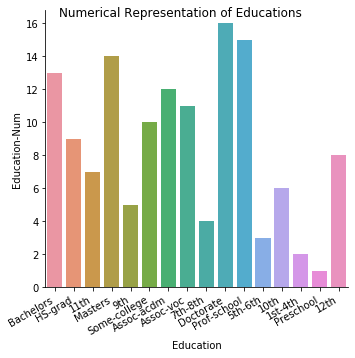

In [6]:
ax = sns.catplot(x='Education', y='Education-Num', kind='bar', data=df_no_outliers)
ax.fig.suptitle('Numerical Representation of Educations')
ax.fig.autofmt_xdate()

From the previous plot, we can see that 
* Bachelor <==> 13  
* HS-grad <==> 9
* 7th-8th <==> 4   
* 9th <==> 5    
* Preschool <==> 1 
* etc.  
Based on those information, we can say that our previous hypothesis is verified, so, we will need only one column to represent the **level of education**, and in our case.    
We will choose **Education-Num** (remove **Education** column) which corresponds to the numerical representation since there is an order in terms of level of education, and the numerical representation already satisfies this condition.  

In [7]:
# Finally remove the Education column  
df_no_outliers.drop('Education', axis=1, inplace=True)

##### A.2- Capital-Loss and Capital-Gain  
From those two features, we can create a new column called **Capital-State** that will be the difference between Capital-Gain and Capital-Loss. Let's call it **Capital-State**.  
Then we will keep the derived feature, then remove **Capital Gain** and **Capital Loss**.  

In [8]:
df_no_outliers['Capital-State'] = df_no_outliers['Capital-Gain'] - df_no_outliers['Capital-Loss']

In [9]:
# Then remove Capital-Gain and Capital-Loss. 
df_no_outliers.drop(['Capital-Gain', 'Capital-Loss'], axis=1, inplace=True)

In [11]:
df_no_outliers.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education-Num', 'Martial Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours-per-week',
       'Country', 'Income', 'Capital-State'],
      dtype='object')

##### A.3- Age State (Adult or Child)   
A person older than 18 is an adult, otherwise he/she is a child.  

In [14]:
# AgeState based on Age
df_no_outliers['AgeState'] = np.where(df_no_outliers['Age'] >= 18, 'Adult', 'Child')

In [19]:
# Drop Age column  
df_no_outliers.drop('Age', axis=1, inplace=True)

In [20]:
# AgeState Counts  
df_no_outliers['AgeState'].value_counts()

Adult    48000
Child      595
Name: AgeState, dtype: int64

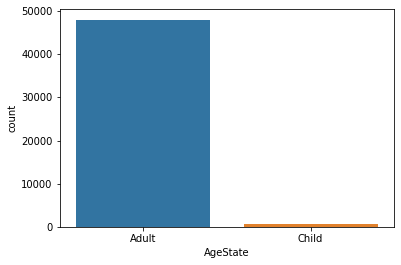

In [21]:
sns.countplot(x='AgeState', data=df_no_outliers)

**fnlwgt** column is not an important feature, so let's drop it. 

In [ ]:
df_no_outliers.drop('fnlwgt', axis=1, inplace=True)

We have added new features, and remove some. Let's have a look at our new dataframe.  

In [23]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48595 entries, 0 to 48594
Data columns (total 12 columns):
Workclass         48595 non-null object
Education-Num     48595 non-null int64
Martial Status    48595 non-null object
Occupation        48595 non-null object
Relationship      48595 non-null object
Race              48595 non-null object
Sex               48595 non-null object
Hours-per-week    48595 non-null int64
Country           48595 non-null object
Income            48595 non-null object
Capital-State     48595 non-null int64
AgeState          48595 non-null object
dtypes: int64(3), object(9)
memory usage: 4.4+ MB


#### B- Categorical Feature encoding    
A machine learning model only works with numerical features. To do so, we need to encode all our categorical features. Those features are represented by **object**  with the help of the previous **info** command.    
We are going to perform the **One Hot Ending** method on all those categorical features by using Pandas **get_dummies()** function.  
We are not going to take in consideration **Income** column, because it is the one we are trying to predict.  

In [24]:
# Columns: Workclass, Martial Status Occupation, Relationship, Race, Sex, Country, AgeState
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Workclass', 'Martial Status', 'Occupation', 
                                 'Relationship', 'Race', 'Sex', 'Country', 'AgeState'])

Now we can separately encode our **Income** feature, such that:  
* **1**: for the people who make more than 50K  
* **0**: for those who do not.   
But before that, let have a look at the values in **Income** column.  

In [25]:
df_no_outliers['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
# Let's encode it.  
df_no_outliers['Income'] = np.where(df_no_outliers['Income'] =='>50K', 1, 0)

In [27]:
# Check it now after encoding. 
df_no_outliers['Income'].unique()

array([0, 1], dtype=int64)

We have finally encoded all our features into numerical values. Now we are going to reorder the columns in order to have **Income** as last feature.  

In [28]:
reordered_columns = [column for column in df_no_outliers.columns if column != 'Income']
reordered_columns = reordered_columns + ['Income'] 
df = df_no_outliers[reordered_columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48595 entries, 0 to 48594
Data columns (total 89 columns):
Education-Num                           48595 non-null int64
Hours-per-week                          48595 non-null int64
Capital-State                           48595 non-null int64
Workclass_Federal-gov                   48595 non-null uint8
Workclass_Local-gov                     48595 non-null uint8
Workclass_Never-worked                  48595 non-null uint8
Workclass_Private                       48595 non-null uint8
Workclass_Self-emp-inc                  48595 non-null uint8
Workclass_Self-emp-not-inc              48595 non-null uint8
Workclass_State-gov                     48595 non-null uint8
Workclass_Without-pay                   48595 non-null uint8
Martial Status_Divorced                 48595 non-null uint8
Martial Status_Married-AF-spouse        48595 non-null uint8
Martial Status_Married-civ-spouse       48595 non-null uint8
Martial Status_Married-spouse-absent 

**Conclusion**: all the features have been encoded, we are now ready for creating our machine learning models. Let's save this new dataset for the next step.  

In [30]:
print("Saving the dataframe after feature engineering...")
df.to_csv('data/feat_engineered_data.csv', index=False)

Saving the dataframe after feature engineering...


**Go to the next step with 3_Exploratory-Data-Analysis.ipynb**